In [25]:
## load useful libraries
suppressWarnings(suppressPackageStartupMessages(library(rhdf5)))
suppressWarnings(suppressPackageStartupMessages(library(qvalue)))
suppressWarnings(suppressPackageStartupMessages(library(dplyr)))
suppressWarnings(suppressPackageStartupMessages(library(cowplot)))
suppressWarnings(suppressPackageStartupMessages(library(tidyverse)))
suppressWarnings(suppressPackageStartupMessages(library(ggbeeswarm)))
suppressWarnings(suppressPackageStartupMessages(library(ggthemes)))
suppressWarnings(suppressPackageStartupMessages(library(scater)))
suppressWarnings(suppressPackageStartupMessages(library(SingleCellExperiment)))
suppressWarnings(suppressPackageStartupMessages(library(edgeR)))
suppressWarnings(suppressPackageStartupMessages(library(limma)))
suppressWarnings(suppressPackageStartupMessages(library(ggplot2)))
suppressWarnings(suppressPackageStartupMessages(library(ISLR)))
suppressWarnings(suppressPackageStartupMessages(library(GGally)))
suppressWarnings(suppressPackageStartupMessages(library(scran)))
suppressWarnings(suppressPackageStartupMessages(library(ComplexHeatmap)))
suppressWarnings(suppressPackageStartupMessages(library(circlize)))
suppressWarnings(suppressPackageStartupMessages(library(ggthemes)))

ERROR: Error in library(ISLR): there is no package called ‘ISLR’


In [2]:
# ase_folder = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_endodiff/data/ase_env_interactions/selected_results_181009/"
ase_folder = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_endodiff/data/ase_env_interactions/selected_results_181023/"

In [3]:
# test_filename = paste0(ase_folder,"PCA_and_cluster_means.single_factor_test.complete_ase_phased.all_leads.tsv")
# pseudocorrect_filename = paste0(ase_folder,"PCA_and_cluster_means.pseudotime_covariate_test.complete_ase_phased.all_leads.tsv")
# nonlinear_filename = paste0(ase_folder,"PCA_and_cluster_means.combined_factor_test.complete_ase_phased.all_leads.tsv")

In [122]:
test_filename = paste0(ase_folder,"pseudotimeandmodules.single_factor_test.all_leads.tsv")
pseudocorrect_filename = paste0(ase_folder,"pseudotimeandmodules.pseudotime_covariate_test.all_leads.tsv")
nonlinear_filename = paste0(ase_folder,"pseudotimeandmodules.combined_factor_test.all_leads.tsv")
quadratic_filename = paste0(ase_folder,"pseudotimeandmodules.quadratic_factor_test.all_leads.tsv")

In [5]:
test = read.csv(test_filename, sep = "\t")
head(test)

ensembl_gene_id snp_id           coef        pval          n_cells
1 ENSG00000120675 13_43597706_C_T   0.21237431 1.501785e-196 13767  
2 ENSG00000148834 10_106066436_C_T  0.16746507 2.678167e-166 16460  
3 ENSG00000124614 6_34396160_C_T   -0.14332358 1.988244e-114 10331  
4 ENSG00000124614 6_34393845_G_A   -0.14332358 1.988244e-114 10331  
5 ENSG00000132507 17_7207964_A_C   -0.09660721 3.211590e-110 19271  
6 ENSG00000132507 17_7207964_A_C   -0.09608955 1.752196e-106 19271  
  index                                   mean_ase  factor             
1 ('ENSG00000120675', '13_43597706_C_T')  0.1503029 pseudotime         
2 ('ENSG00000148834', '10_106066436_C_T') 0.4569987 pseudotime         
3 ('ENSG00000124614', '6_34396160_C_T')   0.3681452 pseudotime         
4 ('ENSG00000124614', '6_34393845_G_A')   0.3681452 pseudotime         
5 ('ENSG00000132507', '17_7207964_A_C')   0.3418273 G2_M_transition    
6 ('ENSG00000132507', '17_7207964_A_C')   0.3418273 sterol_biosynthesis

In [6]:
quadratic = read.csv(quadratic_filename, sep = "\t")
head(quadratic)

ensembl_gene_id snp_id          coef       pval          n_cells
1 ENSG00000142089 11_320394_C_T    0.9779608 1.529277e-190 21955  
2 ENSG00000142089 11_323649_C_T    0.9610874 1.341942e-180 21955  
3 ENSG00000120675 13_43597706_C_T  0.7184553  1.391857e-73 13767  
4 ENSG00000132507 17_7207964_A_C   0.3774398  3.938858e-48 19271  
5 ENSG00000132507 17_7207964_A_C   0.2315262  9.203289e-48 19271  
6 ENSG00000132507 17_7207964_A_C  -0.1952518  2.856513e-37 19271  
  index                                  mean_ase  factor             
1 ('ENSG00000142089', '11_320394_C_T')   0.2617752 pseudotime         
2 ('ENSG00000142089', '11_323649_C_T')   0.2641385 pseudotime         
3 ('ENSG00000120675', '13_43597706_C_T') 0.1503029 pseudotime         
4 ('ENSG00000132507', '17_7207964_A_C')  0.3418273 respiration        
5 ('ENSG00000132507', '17_7207964_A_C')  0.3418273 sterol_biosynthesis
6 ('ENSG00000132507', '17_7207964_A_C')  0.3418273 pseudotime

In [7]:
test$snp_id[grep("ENSG00000185201",test$snp_id)]

character(0)

In [8]:
test[test$ensembl_gene_id == 'ENSG00000185201' & test$snp_id == '11_302663_G_T',]

ensembl_gene_id snp_id        coef         pval         n_cells
66    ENSG00000185201 11_302663_G_T -0.213577364 3.139344e-21 8719   
281   ENSG00000185201 11_302663_G_T -0.099482968 2.076438e-09 8719   
778   ENSG00000185201 11_302663_G_T -0.045601705 5.214397e-05 8719   
14501 ENSG00000185201 11_302663_G_T  0.005599698 5.941925e-01 8719   
18357 ENSG00000185201 11_302663_G_T  0.003281734 8.488351e-01 8719   
      index                                mean_ase  factor             
66    ('ENSG00000185201', '11_302663_G_T') 0.6864926 respiration        
281   ('ENSG00000185201', '11_302663_G_T') 0.6864926 G2_M_transition    
778   ('ENSG00000185201', '11_302663_G_T') 0.6864926 G1_S_transition    
14501 ('ENSG00000185201', '11_302663_G_T') 0.6864926 pseudotime         
18357 ('ENSG00000185201', '11_302663_G_T') 0.6864926 sterol_biosynthesis

In [9]:
# test$eqtl = test$snp_id
# test$snp_id = gsub("'","",gsub("'\\)","",gsub(".*,","",test$eqtl)))
# test$ensembl_gene_id = gsub("'","",gsub("\\('","",gsub(",.*","",test$eqtl)))
# head(test)

In [10]:
first_test_sign <- function(test, myfact){
    res = test
#     res = test[test$factor %in% c("PC1","0","10","28","30"),]
    res = res[res$n_cells > 500,]
    res = res[!(is.na(res$pval)),]
    res$corr_pval = p.adjust(res$pval, method = "BH")
    length(unique(res[res$corr_pval < 0.1 & res$factor == myfact,"ensembl_gene_id"]))
} 

In [11]:
# pseudotime
# first_test_sign(test, "PC1")
first_test_sign(test, "pseudotime")

[1] 499

In [12]:
quadratic_test_sign <- function(test, myfact){
    res = test
#     res = test[test$factor %in% c("PC1","0","10","28","30"),]
    res = res[res$n_cells > 500,]
    res = res[!(is.na(res$pval)),]
    res$corr_pval = p.adjust(res$pval, method = "BH")
    length(unique(res[res$corr_pval < 0.1 & res$factor == myfact,"ensembl_gene_id"]))
} 

In [13]:
quadratic_test_sign(quadratic, "pseudotime")

[1] 154

In [14]:
# respiration
# first_test_sign(test, "0")
first_test_sign(test, "respiration")
# cell cycle (G1/S)
# first_test_sign(test, "10")
first_test_sign(test, "G1_S_transition")
# cholesterol (steroid) biosynthesis
# first_test_sign(test, "28")
first_test_sign(test, "sterol_biosynthesis")
# cell cycle (G2/M)
# first_test_sign(test, "30")
first_test_sign(test, "G2_M_transition")

[1] 367

[1] 317

[1] 276

[1] 321

In [123]:
pseudocorrect = read.csv(pseudocorrect_filename, sep = "\t")
head(pseudocorrect)

ensembl_gene_id snp_id          coef        pval          n_cells
1 ENSG00000132507 17_7207964_A_C  -0.13534786 1.007140e-174 19271  
2 ENSG00000132507 17_7207964_A_C  -0.09408758 4.714347e-101 19271  
3 ENSG00000167526 16_89613530_G_A -0.10303865  1.475137e-65 15893  
4 ENSG00000167526 16_89624574_A_T -0.09000780  1.166296e-50 15251  
5 ENSG00000142089 11_320394_C_T    0.20030268  2.050679e-44 21955  
6 ENSG00000142089 11_323649_C_T    0.19940265  2.940414e-43 21955  
  index                                  mean_ase  factor             
1 ('ENSG00000132507', '17_7207964_A_C')  0.3418273 G2_M_transition    
2 ('ENSG00000132507', '17_7207964_A_C')  0.3418273 sterol_biosynthesis
3 ('ENSG00000167526', '16_89613530_G_A') 0.3922887 respiration        
4 ('ENSG00000167526', '16_89624574_A_T') 0.3879481 respiration        
5 ('ENSG00000142089', '11_320394_C_T')   0.2617752 respiration        
6 ('ENSG00000142089', '11_323649_C_T')   0.2641385 respiration

In [16]:
pseudocorrect$eqtl = pseudocorrect$snp_id
pseudocorrect$snp_id = gsub("'","",gsub("'\\)","",gsub(".*,","",pseudocorrect$eqtl)))
pseudocorrect$ensembl_gene_id = gsub("'","",gsub("\\('","",gsub(",.*","",pseudocorrect$eqtl)))
head(pseudocorrect)

ensembl_gene_id snp_id          coef        pval          n_cells
1 17_7207964_A_C  17_7207964_A_C  -0.13534786 1.007140e-174 19271  
2 17_7207964_A_C  17_7207964_A_C  -0.09408758 4.714347e-101 19271  
3 16_89613530_G_A 16_89613530_G_A -0.10303865  1.475137e-65 15893  
4 16_89624574_A_T 16_89624574_A_T -0.09000780  1.166296e-50 15251  
5 11_320394_C_T   11_320394_C_T    0.20030268  2.050679e-44 21955  
6 11_323649_C_T   11_323649_C_T    0.19940265  2.940414e-43 21955  
  index                                  mean_ase  factor             
1 ('ENSG00000132507', '17_7207964_A_C')  0.3418273 G2_M_transition    
2 ('ENSG00000132507', '17_7207964_A_C')  0.3418273 sterol_biosynthesis
3 ('ENSG00000167526', '16_89613530_G_A') 0.3922887 respiration        
4 ('ENSG00000167526', '16_89624574_A_T') 0.3879481 respiration        
5 ('ENSG00000142089', '11_320394_C_T')   0.2617752 respiration        
6 ('ENSG00000142089', '11_323649_C_T')   0.2641385 respiration        
  eqtl           
1 17_7207964_A_C 
2 17_7207964_A_C 
3 16_89613530_G_A
4 16_89624574_A_T
5 11_320394_C_T  
6 11_323649_C_T

In [17]:
second_test_sign <- function(test, myfact){
    res = test
#     res = test[test$factor %in% c("0","10","28","30"),]
    res = res[res$n_cells > 500,]
    res = res[!(is.na(res$pval)),]
    res$corr_pval = p.adjust(res$pval, method = "BH")
    length(unique(res[res$corr_pval < 0.1 & res$factor == myfact,"ensembl_gene_id"]))
} 

In [18]:
# respiration
# second_test_sign(pseudocorrect, "0")
second_test_sign(pseudocorrect, "respiration")
# cell cycle (G1/S)
# second_test_sign(pseudocorrect, "10")
second_test_sign(pseudocorrect, "G1_S_transition")
# cholesterol (steroid) biosynthesis
# second_test_sign(pseudocorrect, "28")
second_test_sign(pseudocorrect, "sterol_biosynthesis")
# cell cycle (G2/M)
# second_test_sign(pseudocorrect, "30")
second_test_sign(pseudocorrect, "G2_M_transition")

[1] 283

[1] 208

[1] 302

[1] 250

In [19]:
nonlinear = read.csv(nonlinear_filename, sep = "\t")
head(nonlinear)

ensembl_gene_id snp_id         coef      pval         n_cells
1 ENSG00000132507 17_7207964_A_C 0.4925942 1.423945e-82 19271  
2 ENSG00000132507 17_7207964_A_C 0.2811927 8.621735e-45 19271  
3 ENSG00000132507 17_7207964_A_C 0.3527488 1.587768e-44 19271  
4 ENSG00000124614 6_34396160_C_T 0.6444228 4.987902e-37 10331  
5 ENSG00000124614 6_34393845_G_A 0.6444228 4.987902e-37 10331  
6 ENSG00000132507 17_7207964_A_C 0.2665369 4.209605e-33 19271  
  index                                 mean_ase  factor1            
1 ('ENSG00000132507', '17_7207964_A_C') 0.3418273 respiration        
2 ('ENSG00000132507', '17_7207964_A_C') 0.3418273 sterol_biosynthesis
3 ('ENSG00000132507', '17_7207964_A_C') 0.3418273 respiration        
4 ('ENSG00000124614', '6_34396160_C_T') 0.3681452 respiration        
5 ('ENSG00000124614', '6_34393845_G_A') 0.3681452 respiration        
6 ('ENSG00000132507', '17_7207964_A_C') 0.3418273 pseudotime         
  factor2            
1 sterol_biosynthesis
2 G2_M_transition    
3 G2_M_transition    
4 G2_M_transition    
5 G2_M_transition    
6 respiration

In [20]:
# nonlinear$eqtl = nonlinear$snp_id
# nonlinear$snp_id = gsub("'","",gsub("'\\)","",gsub(".*,","",nonlinear$eqtl)))
# nonlinear$ensembl_gene_id = gsub("'","",gsub("\\('","",gsub(",.*","",nonlinear$eqtl)))
# head(nonlinear)

In [21]:
third_test_sign <- function(test, myfact){
#     res = test[test$factor1 == "PC1" & test$factor2 %in% c("0","10","28","30"),]
    res = test[test$factor1 == "pseudotime" & test$factor2 != "pseudotime",]
    res = res[res$n_cells > 500,]
    res = res[!(is.na(res$pval)),]
    res$corr_pval = p.adjust(res$pval, method = "BH")
    length(unique(res[res$corr_pval < 0.1 & res$factor2 == myfact,"ensembl_gene_id"]))
} 

In [22]:
# respiration
# third_test_sign(nonlinear, "0")
third_test_sign(nonlinear, "respiration")
# cell cycle (G1/S)
# third_test_sign(nonlinear, "10")
third_test_sign(nonlinear, "G1_S_transition")
# cholesterol (steroid) biosynthesis
# third_test_sign(nonlinear, "28")
third_test_sign(nonlinear, "sterol_biosynthesis")
# cell cycle (G2/M)
# third_test_sign(nonlinear, "30")
third_test_sign(nonlinear, "G2_M_transition")

[1] 91

[1] 42

[1] 36

[1] 52

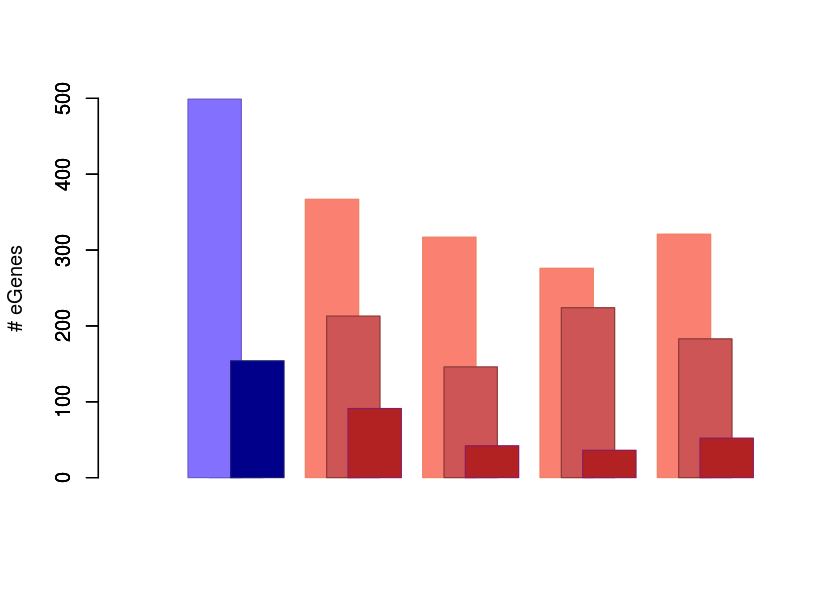

In [23]:
options(repr.plot.width = 7, repr.plot.height = 5)
single_factor <- c(499, 367, 317, 276, 321)
pseudo_covar <- c(0, 213, 146, 224, 183)
non_linear <- c(154, 91, 42, 36, 52)
ymax <- single_factor[which.max(single_factor)]
x <- barplot(single_factor, 
             border = c('slateblue','salmon2', 'salmon2', 'salmon2', 'salmon2'),
             col = c('lightslateblue','salmon', 'salmon', 'salmon', 'salmon'),
             xlim = c(0, 6), ylim = c(0, 500), space = 1.2,
             width = 0.5, ylab = "# eGenes")
par(new = TRUE)
barplot(pseudo_covar,  
        border = c('slateblue', 'indianred4','indianred4','indianred4','indianred4'), 
        col = 'indianred3',
        xlim = c(-0.2, 5.8), ylim = c(0, 500),
        width = 0.5, space = 1.2, axisnames = FALSE)
par(new = TRUE)
barplot(non_linear,  
        border = c('midnightblue', 'maroon4','maroon4','maroon4','maroon4'), 
        col = c('darkblue', 'firebrick','firebrick','firebrick','firebrick'),
        xlim = c(-0.4, 5.6), ylim = c(0, 500),
        width = 0.5, space = 1.2, axisnames = FALSE)

In [24]:
col2rgb("slateblue", alpha = FALSE)

[,1]
red   106 
green  90 
blue  205

In [2]:
all.ase.filename = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_endodiff/data/ase/complete_ase_phased.all_leads.tsv"

In [3]:
all.ase = read.csv(all.ase.filename, sep = "\t", as.is = T, header = T)
all.ase[1:5,1:5]

ensembl_gene_id snp_id          X24722_4.117 X24722_4.118 X24722_4.145
1 ENSG00000076924 19_7710920_G_A         NA           NA          NA    
2 ENSG00000233927 19_8387207_G_A  0.4444444    0.2307692    0.483871    
3 ENSG00000226278 7_55802063_T_C         NA           NA          NA    
4 ENSG00000164587 5_149826526_C_T        NA           NA          NA    
5 ENSG00000163682 4_39446549_G_A         NA           NA          NA

In [4]:
colnames(all.ase) <- gsub("\\.","#",gsub("X","",colnames(all.ase)))
all.ase[1:5,1:5]

ensembl_gene_id snp_id          24722_4#117 24722_4#118 24722_4#145
1 ENSG00000076924 19_7710920_G_A         NA          NA         NA   
2 ENSG00000233927 19_8387207_G_A  0.4444444   0.2307692   0.483871   
3 ENSG00000226278 7_55802063_T_C         NA          NA         NA   
4 ENSG00000164587 5_149826526_C_T        NA          NA         NA   
5 ENSG00000163682 4_39446549_G_A         NA          NA         NA

In [5]:
factors.filename = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_endodiff/data/sce_merged_afterqc_filt_allexpts.PCA.cluster_means.tsv"

In [6]:
factors = read.csv(factors.filename, sep = "\t", header = T, row.names = 1)
colnames(factors) <- gsub("X","",colnames(factors))
head(factors)

PC1         PC2       PC3      PC4       PC5        PC6      
21843_1#10  -2.96677786 -5.051700 2.557705 1.7846318 -3.8000932 2.7520889
21843_1#100  2.99582684 -9.416975 3.945243 4.6289860 -1.2671332 1.6378075
21843_1#101 -0.08867775 -6.769028 5.613472 1.8904508 -1.3355565 0.6089684
21843_1#102 -5.00171746 -4.727163 2.400886 2.0255520 -2.0095244 5.2201763
21843_1#103 -2.08193872 -6.209893 4.675325 0.5933318 -0.6481828 3.4695832
21843_1#105 -0.71012454 -6.392112 4.809889 0.5048616 -0.4834257 1.2074208
            PC7         PC8         PC9        PC10       ⋯ 50        51      
21843_1#10   0.04011419 -0.65210263 -2.4088645 -1.4745952 ⋯ 0.9746980 1.157624
21843_1#100  0.24622875  2.11823943 -0.1742999 -1.1184431 ⋯ 0.8779742 1.035389
21843_1#101  0.80128325  0.42480083  1.0950508  1.1932872 ⋯ 0.9319036 1.083866
21843_1#102  1.46083794 -1.89020695 -0.4836101  0.6099583 ⋯ 0.9637354 1.166783
21843_1#103 -0.36674697 -0.72786039 -0.6366988  0.3395057 ⋯ 1.0077623 1.192433
21843_1#105  3.08038259  0.05347892 -1.7887607 -2.4269346 ⋯ 0.9450494 1.060659
            52        53        54        55        56        57       
21843_1#10  1.0561422 0.6647575 1.0319868 0.9611851 1.1291618 1.1297945
21843_1#100 0.7064237 0.7908379 0.9249539 0.9632030 0.9793299 0.9073227
21843_1#101 0.8746851 0.6844323 0.9858303 0.9590457 1.1212404 1.1387067
21843_1#102 1.0856965 0.5970522 1.0349560 0.8610726 1.1574574 1.1208192
21843_1#103 1.0881635 0.6984261 0.9993791 0.9143417 1.0999614 1.0552629
21843_1#105 1.0799314 0.8152264 0.9843815 0.9029240 1.0742548 1.1586082
            58       59      
21843_1#10  1.105578 1.475525
21843_1#100 1.006672 1.317119
21843_1#101 1.041555 1.390104
21843_1#102 1.088636 1.499318
21843_1#103 1.053882 1.557355
21843_1#105 1.167950 1.494102

In [7]:
all.ase.use = all.ase[,3:ncol(all.ase)]
rownames(all.ase.use) = paste0(all.ase$ensembl_gene_id,"-",all.ase$snp_id)
all.ase.use[1:5,1:5]

24722_4#117 24722_4#118 24722_4#145 24722_4#165
ENSG00000076924-19_7710920_G_A         NA          NA         NA           NA  
ENSG00000233927-19_8387207_G_A  0.4444444   0.2307692   0.483871    0.4722222  
ENSG00000226278-7_55802063_T_C         NA          NA         NA           NA  
ENSG00000164587-5_149826526_C_T        NA          NA         NA           NA  
ENSG00000163682-4_39446549_G_A         NA          NA         NA           NA  
                                24722_4#172
ENSG00000076924-19_7710920_G_A   NA        
ENSG00000233927-19_8387207_G_A  0.3        
ENSG00000226278-7_55802063_T_C   NA        
ENSG00000164587-5_149826526_C_T  NA        
ENSG00000163682-4_39446549_G_A   NA

In [8]:
all.ase.use = all.ase.use[,order(colnames(all.ase.use))]
all.ase.use[1:5,1:5]

20416_1#112 20416_1#117 20416_1#121 20416_1#122
ENSG00000076924-19_7710920_G_A         NA   NA                  NA          NA 
ENSG00000233927-19_8387207_G_A  0.4325843   NA                  NA          NA 
ENSG00000226278-7_55802063_T_C         NA   NA                  NA          NA 
ENSG00000164587-5_149826526_C_T        NA   NA          0.35789474  0.37142857 
ENSG00000163682-4_39446549_G_A         NA   NA          0.07017544  0.04819277 
                                20416_1#138
ENSG00000076924-19_7710920_G_A  NA         
ENSG00000233927-19_8387207_G_A  NA         
ENSG00000226278-7_55802063_T_C  NA         
ENSG00000164587-5_149826526_C_T NA         
ENSG00000163682-4_39446549_G_A  NA

In [9]:
factors.use = factors[,c("PC1","0","10","28","30")]

In [10]:
factors.use = factors.use[order(rownames(factors.use)),]
head(factors.use)

PC1       0         10        28        30       
21241_6#10  13.228098 0.6783386 0.9383156 1.1445754 0.9105237
21241_6#100 12.654600 0.5452831 1.2721282 1.0606174 0.8521913
21241_6#101 11.417531 0.7268723 0.9869819 0.9909141 0.7736360
21241_6#103 12.051899 0.7755067 0.5480528 1.0274601 0.7162105
21241_6#104 13.717548 0.5587750 0.9084523 1.0805072 0.6435869
21241_6#105  9.693353 0.6764648 0.8378125 1.1790484 0.9016080

In [11]:
all.ase.use = all.ase.use[,colnames(all.ase.use) %in% rownames(factors.use)]
all.ase.use[1:5,1:5]

21241_6#10 21241_6#100 21241_6#101 21241_6#103
ENSG00000076924-19_7710920_G_A          NA        NA          NA          NA  
ENSG00000233927-19_8387207_G_A          NA        NA          NA   0.4615385  
ENSG00000226278-7_55802063_T_C          NA        NA          NA          NA  
ENSG00000164587-5_149826526_C_T 0.39705882 0.3548387          NA   0.3815789  
ENSG00000163682-4_39446549_G_A  0.08571429 0.2142857   0.1176471          NA  
                                21241_6#104
ENSG00000076924-19_7710920_G_A  NA         
ENSG00000233927-19_8387207_G_A  NA         
ENSG00000226278-7_55802063_T_C  NA         
ENSG00000164587-5_149826526_C_T NA         
ENSG00000163682-4_39446549_G_A  NA

In [12]:
df1 = factors.use
df1$cells = rownames(factors.use)
head(df1)

PC1       0         10        28        30        cells      
21241_6#10  13.228098 0.6783386 0.9383156 1.1445754 0.9105237 21241_6#10 
21241_6#100 12.654600 0.5452831 1.2721282 1.0606174 0.8521913 21241_6#100
21241_6#101 11.417531 0.7268723 0.9869819 0.9909141 0.7736360 21241_6#101
21241_6#103 12.051899 0.7755067 0.5480528 1.0274601 0.7162105 21241_6#103
21241_6#104 13.717548 0.5587750 0.9084523 1.0805072 0.6435869 21241_6#104
21241_6#105  9.693353 0.6764648 0.8378125 1.1790484 0.9016080 21241_6#105

In [13]:
# require("scales")
# show_col(canva_pal("Bold and punchy")(4))
col_g2m = canva_pal("Bold and punchy")(4)[4]
col_resp = canva_pal("Bold and punchy")(4)[2]

In [14]:
##### TP53

In [15]:
gene = "ENSG00000141510_TP53"
gene_symbol = "TP53"
ensembl_gene_id = "ENSG00000141510"

In [16]:
df0 = data.frame(gene =  t(all.ase.use[grep(ensembl_gene_id, rownames(all.ase.use)),]), cells = colnames(all.ase.use))
head(df0)

ENSG00000141510.17_7557060_G_A cells      
21241_6#10  NA                             21241_6#10 
21241_6#100 NA                             21241_6#100
21241_6#101 NA                             21241_6#101
21241_6#103 NA                             21241_6#103
21241_6#104 NA                             21241_6#104
21241_6#105 NA                             21241_6#105

In [17]:
df = inner_join(df0,df1,by = "cells")
head(df)

ENSG00000141510.17_7557060_G_A cells       PC1       0         10       
1 NA                             21241_6#10  13.228098 0.6783386 0.9383156
2 NA                             21241_6#100 12.654600 0.5452831 1.2721282
3 NA                             21241_6#101 11.417531 0.7268723 0.9869819
4 NA                             21241_6#103 12.051899 0.7755067 0.5480528
5 NA                             21241_6#104 13.717548 0.5587750 0.9084523
6 NA                             21241_6#105  9.693353 0.6764648 0.8378125
  28        30       
1 1.1445754 0.9105237
2 1.0606174 0.8521913
3 0.9909141 0.7736360
4 1.0274601 0.7162105
5 1.0805072 0.6435869
6 1.1790484 0.9016080

In [18]:
df.plot = df
colnames(df.plot) <- c("snp","cells","pseudo","respiration","G1S","chol","G2M")
head(df.plot)

snp cells       pseudo    respiration G1S       chol      G2M      
1 NA  21241_6#10  13.228098 0.6783386   0.9383156 1.1445754 0.9105237
2 NA  21241_6#100 12.654600 0.5452831   1.2721282 1.0606174 0.8521913
3 NA  21241_6#101 11.417531 0.7268723   0.9869819 0.9909141 0.7736360
4 NA  21241_6#103 12.051899 0.7755067   0.5480528 1.0274601 0.7162105
5 NA  21241_6#104 13.717548 0.5587750   0.9084523 1.0805072 0.6435869
6 NA  21241_6#105  9.693353 0.6764648   0.8378125 1.1790484 0.9016080

In [19]:
# # pseudotime
# "PC1"
# # respiration
# "0"
# # cell cycle (G1/S)
# "10"
# # cholesterol (steroid) biosynthesis
# "28"
# # cell cycle (G2/M)
# "30"

In [20]:
p = ggplot(df.plot, aes(x = pseudo, y = snp))
p = p + ggtitle("TP53")
p = p + xlab("pseudotime") + ylab("ASE") 
p = p + geom_density_2d(col = "lightslateblue") 
p = p + stat_smooth(colour = "lightslateblue", linetype = 2, method = "lm")
p = p +  theme(legend.position = "none", panel.border = element_blank())
p1 = p

In [21]:
test[test$ensembl_gene_id == "ENSG00000141510" & test$factor == "pseudotime",]

ERROR: Error in eval(expr, envir, enclos): object 'test' not found


In [22]:
p = ggplot(df.plot, aes(x = G2M, y = snp))
p = p + xlab("cell cycle (G2/M)") + ylab("ASE") 
p = p + geom_density_2d(col = col_g2m) 
p = p + stat_smooth(colour = col_g2m, linetype = 2, method = "lm")
p = p +  theme(legend.position="none", panel.border = element_blank())
p2 = p #+ xlim(c(0.5,1.3))

In [ ]:
pseudocorrect[pseudocorrect$ensembl_gene_id == "ENSG00000141510" & pseudocorrect$factor == "G2_M_transition",]

In [23]:
p = ggplot(df.plot, aes(x = respiration, y = snp))
p = p + xlab("respiration") + ylab("ASE") 
p = p + geom_density_2d(col = col_resp) 
p = p + stat_smooth(colour = col_resp, linetype = 2, method = "lm")
p = p +  theme(legend.position="none", panel.border = element_blank())
p3 = p + xlim(c(0.6,1.4))

In [ ]:
pseudocorrect[pseudocorrect$ensembl_gene_id == "ENSG00000141510" & pseudocorrect$factor == "respiration",]

Warning message:
“Removed 33680 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 33680 rows containing non-finite values (stat_smooth).”

Warning message:
“Removed 33680 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 33680 rows containing non-finite values (stat_smooth).”

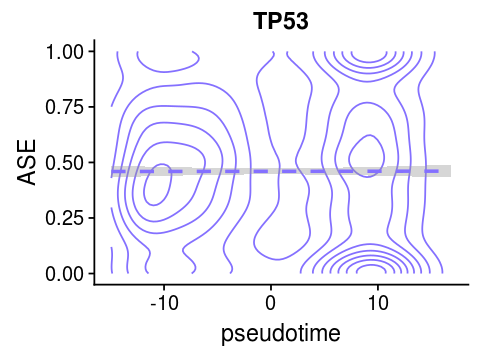

Warning message:
“Removed 33704 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 33704 rows containing non-finite values (stat_smooth).”

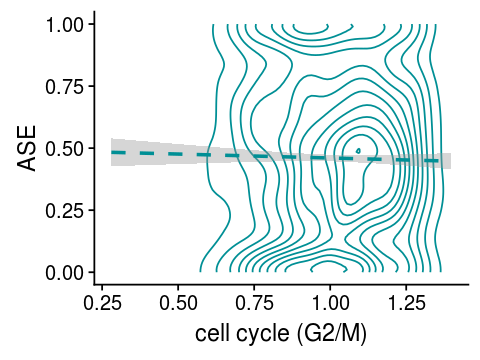

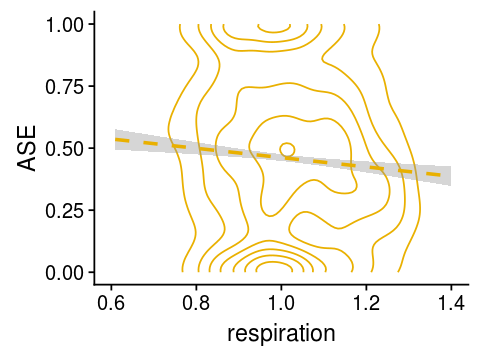

In [24]:
options(repr.plot.width = 4, repr.plot.height = 3)
p1
p2
p3

In [50]:
gene = "ENSG00000149084_HSD17B12"
gene_symbol = "HSD17B12"
ensembl_gene_id = "ENSG00000149084"

In [51]:
test[test$ensembl_gene_id == ensembl_gene_id & test$factor == "pseudotime",]

ensembl_gene_id snp_id          coef         pval      n_cells
7020  ENSG00000149084 11_43813776_T_G -0.012558714 0.1740672 11536  
10664 ENSG00000149084 11_43822885_A_G -0.007687444 0.3607744 14603  
      index                                  mean_ase  factor    
7020  ('ENSG00000149084', '11_43813776_T_G') 0.5544681 pseudotime
10664 ('ENSG00000149084', '11_43822885_A_G') 0.5486127 pseudotime

In [52]:
pseudocorrect[pseudocorrect$ensembl_gene_id == ensembl_gene_id & pseudocorrect$factor == "G2_M_transition",]

ensembl_gene_id snp_id coef pval n_cells index mean_ase factor eqtl

In [53]:
pseudocorrect[pseudocorrect$ensembl_gene_id == ensembl_gene_id & pseudocorrect$factor == "G1_S_transition",]

ensembl_gene_id snp_id coef pval n_cells index mean_ase factor eqtl

In [54]:
pseudocorrect[pseudocorrect$ensembl_gene_id == ensembl_gene_id & pseudocorrect$factor == "respiration",]

ensembl_gene_id snp_id coef pval n_cells index mean_ase factor eqtl

In [55]:
pseudocorrect[pseudocorrect$ensembl_gene_id == ensembl_gene_id & pseudocorrect$factor == "sterol_biosynthesis",]

ensembl_gene_id snp_id coef pval n_cells index mean_ase factor eqtl

In [56]:
df0 = data.frame(gene =  t(all.ase.use[grep(ensembl_gene_id, rownames(all.ase.use)),]), cells = colnames(all.ase.use))
head(df0)

gene.ENSG00000149084.11_43813776_T_G
21241_6#10         NA                           
21241_6#100        NA                           
21241_6#101 0.3333333                           
21241_6#103        NA                           
21241_6#104 0.5357143                           
21241_6#105        NA                           
            gene.ENSG00000149084.11_43822885_A_G cells      
21241_6#10  0.4444444                            21241_6#10 
21241_6#100 0.2222222                            21241_6#100
21241_6#101 0.3333333                            21241_6#101
21241_6#103        NA                            21241_6#103
21241_6#104 0.5357143                            21241_6#104
21241_6#105 0.4615385                            21241_6#105

In [57]:
df = inner_join(df0,df1,by = "cells")
head(df)

gene.ENSG00000149084.11_43813776_T_G gene.ENSG00000149084.11_43822885_A_G
1        NA                            0.4444444                           
2        NA                            0.2222222                           
3 0.3333333                            0.3333333                           
4        NA                                   NA                           
5 0.5357143                            0.5357143                           
6        NA                            0.4615385                           
  cells       PC1       0         10        28        30       
1 21241_6#10  13.228098 0.6783386 0.9383156 1.1445754 0.9105237
2 21241_6#100 12.654600 0.5452831 1.2721282 1.0606174 0.8521913
3 21241_6#101 11.417531 0.7268723 0.9869819 0.9909141 0.7736360
4 21241_6#103 12.051899 0.7755067 0.5480528 1.0274601 0.7162105
5 21241_6#104 13.717548 0.5587750 0.9084523 1.0805072 0.6435869
6 21241_6#105  9.693353 0.6764648 0.8378125 1.1790484 0.9016080

In [58]:
df.plot = df
colnames(df.plot) <- c("snp1","snp2","cells","pseudo","respiration","G1S","chol","G2M")
head(df.plot)

snp1      snp2      cells       pseudo    respiration G1S       chol     
1        NA 0.4444444 21241_6#10  13.228098 0.6783386   0.9383156 1.1445754
2        NA 0.2222222 21241_6#100 12.654600 0.5452831   1.2721282 1.0606174
3 0.3333333 0.3333333 21241_6#101 11.417531 0.7268723   0.9869819 0.9909141
4        NA        NA 21241_6#103 12.051899 0.7755067   0.5480528 1.0274601
5 0.5357143 0.5357143 21241_6#104 13.717548 0.5587750   0.9084523 1.0805072
6        NA 0.4615385 21241_6#105  9.693353 0.6764648   0.8378125 1.1790484
  G2M      
1 0.9105237
2 0.8521913
3 0.7736360
4 0.7162105
5 0.6435869
6 0.9016080

In [59]:
p = ggplot(df.plot, aes(x = pseudo, y = snp1))
p = p + ggtitle(gene_symbol)
p = p + xlab("pseudotime") + ylab("ASE") 
p = p + geom_density_2d(col = "lightslateblue") 
p = p + stat_smooth(colour = "lightslateblue", linetype = 2, method = "lm")
p = p +  theme(legend.position = "none", panel.border = element_blank())
p1 = p

In [60]:
p = ggplot(df.plot, aes(x = G2M, y = snp1))
p = p + xlab("cell cycle (G2/M)") + ylab("ASE") 
p = p + geom_density_2d(col = col_g2m) 
p = p + stat_smooth(colour = col_g2m, linetype = 2, method = "lm")
p = p +  theme(legend.position="none", panel.border = element_blank())
p2 = p + xlim(c(0.5,1.4))

In [61]:
p = ggplot(df.plot, aes(x = respiration, y = snp1))
p = p + xlab("respiration") + ylab("ASE") 
p = p + geom_density_2d(col = col_resp) 
p = p + stat_smooth(colour = col_resp, linetype = 2, method = "lm")
p = p +  theme(legend.position="none", panel.border = element_blank())
p3 = p + xlim(c(0.6,1.4))

Warning message:
“Removed 24506 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 24506 rows containing non-finite values (stat_smooth).”

Warning message:
“Removed 24559 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 24559 rows containing non-finite values (stat_smooth).”

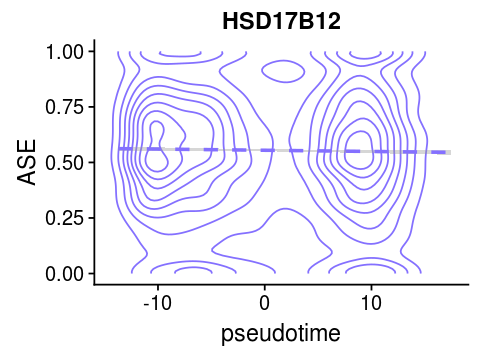

Warning message:
“Removed 24580 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 24580 rows containing non-finite values (stat_smooth).”

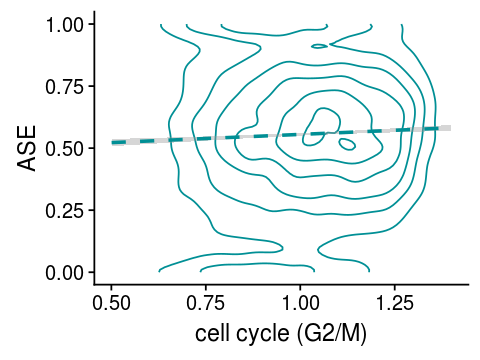

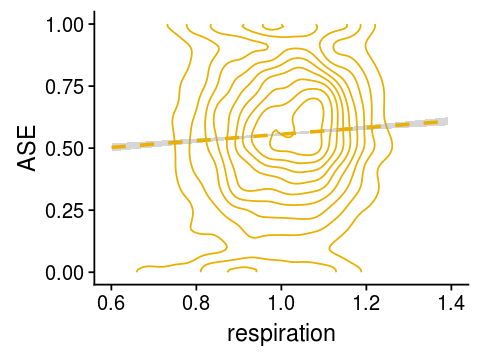

In [62]:
options(repr.plot.width = 4, repr.plot.height = 3)
p1
p2
p3

In [63]:
gene = "ENSG00000185201_IFITM2"
gene_symbol = "IFITM2"
ensembl_gene_id = "ENSG00000185201"

In [64]:
dim(all.ase.use)
dim(factors.use)

[1]  4470 36042

[1] 36044     5

In [65]:
all.ase.use = all.ase.use[,colnames(all.ase.use) %in% rownames(factors.use)]
all.ase.use[1:5,1:5]

21241_6#10 21241_6#100 21241_6#101 21241_6#103
ENSG00000076924-19_7710920_G_A          NA        NA          NA          NA  
ENSG00000233927-19_8387207_G_A          NA        NA          NA   0.4615385  
ENSG00000226278-7_55802063_T_C          NA        NA          NA          NA  
ENSG00000164587-5_149826526_C_T 0.39705882 0.3548387          NA   0.3815789  
ENSG00000163682-4_39446549_G_A  0.08571429 0.2142857   0.1176471          NA  
                                21241_6#104
ENSG00000076924-19_7710920_G_A  NA         
ENSG00000233927-19_8387207_G_A  NA         
ENSG00000226278-7_55802063_T_C  NA         
ENSG00000164587-5_149826526_C_T NA         
ENSG00000163682-4_39446549_G_A  NA

In [66]:
df0 = data.frame(gene =  t(all.ase.use[grep(ensembl_gene_id, rownames(all.ase.use)),]), cells = colnames(all.ase.use))
head(df0)

gene.ENSG00000185201.11_308178_T_C
21241_6#10          NA                        
21241_6#100         NA                        
21241_6#101         NA                        
21241_6#103         NA                        
21241_6#104 0.05405405                        
21241_6#105         NA                        
            gene.ENSG00000185201.11_302663_G_T cells      
21241_6#10  NA                                 21241_6#10 
21241_6#100 NA                                 21241_6#100
21241_6#101 NA                                 21241_6#101
21241_6#103 NA                                 21241_6#103
21241_6#104 NA                                 21241_6#104
21241_6#105 NA                                 21241_6#105

In [67]:
df1 = factors.use
df1$cells = rownames(factors.use)
head(df1)

PC1       0         10        28        30        cells      
21241_6#10  13.228098 0.6783386 0.9383156 1.1445754 0.9105237 21241_6#10 
21241_6#100 12.654600 0.5452831 1.2721282 1.0606174 0.8521913 21241_6#100
21241_6#101 11.417531 0.7268723 0.9869819 0.9909141 0.7736360 21241_6#101
21241_6#103 12.051899 0.7755067 0.5480528 1.0274601 0.7162105 21241_6#103
21241_6#104 13.717548 0.5587750 0.9084523 1.0805072 0.6435869 21241_6#104
21241_6#105  9.693353 0.6764648 0.8378125 1.1790484 0.9016080 21241_6#105

In [68]:
df = inner_join(df0,df1,by = "cells")
head(df)

gene.ENSG00000185201.11_308178_T_C gene.ENSG00000185201.11_302663_G_T
1         NA                         NA                                
2         NA                         NA                                
3         NA                         NA                                
4         NA                         NA                                
5 0.05405405                         NA                                
6         NA                         NA                                
  cells       PC1       0         10        28        30       
1 21241_6#10  13.228098 0.6783386 0.9383156 1.1445754 0.9105237
2 21241_6#100 12.654600 0.5452831 1.2721282 1.0606174 0.8521913
3 21241_6#101 11.417531 0.7268723 0.9869819 0.9909141 0.7736360
4 21241_6#103 12.051899 0.7755067 0.5480528 1.0274601 0.7162105
5 21241_6#104 13.717548 0.5587750 0.9084523 1.0805072 0.6435869
6 21241_6#105  9.693353 0.6764648 0.8378125 1.1790484 0.9016080

In [69]:
df.pseudo = df[,c("gene.ENSG00000185201.11_308178_T_C","gene.ENSG00000185201.11_302663_G_T","PC1")]
colnames(df.pseudo) <- c("snp1","snp2","pseudo")
head(df.pseudo)

snp1       snp2 pseudo   
1         NA NA   13.228098
2         NA NA   12.654600
3         NA NA   11.417531
4         NA NA   12.051899
5 0.05405405 NA   13.717548
6         NA NA    9.693353

In [70]:
# options(repr.plot.width = 5, repr.plot.height = 3)
# p = ggplot(df.pseudo, aes(x = pseudo, y = snp1))
# p = p + ggtitle("IFITM2")
# p = p + xlab("pseudotime") + ylab("ASE") 
# p = p + geom_point(alpha = 0.1, pch = 20, col = "cornflowerblue") 
# p = p + stat_smooth(colour = "darkblue", linetype = 2)
# p = p +  theme(legend.position="none", panel.border = element_blank())
# p

In [71]:
# options(repr.plot.width = 5, repr.plot.height = 3)
# p = ggplot(df.pseudo, aes(x = pseudo, y = snp2))
# p = p + ggtitle("IFITM2")
# p = p + xlab("pseudotime") + ylab("ASE") 
# p = p + geom_point(alpha = 0.1, pch = 20, col = "cornflowerblue") 
# p = p + stat_smooth(colour = "darkblue", linetype = 2)
# p = p +  theme(legend.position="none", panel.border = element_blank())
# p

In [72]:
df.g2m = df[,c("gene.ENSG00000185201.11_308178_T_C","gene.ENSG00000185201.11_302663_G_T","30")]
colnames(df.g2m) <- c("snp1","snp2","G2M")
head(df.g2m)

snp1       snp2 G2M      
1         NA NA   0.9105237
2         NA NA   0.8521913
3         NA NA   0.7736360
4         NA NA   0.7162105
5 0.05405405 NA   0.6435869
6         NA NA   0.9016080

In [73]:
# options(repr.plot.width = 5, repr.plot.height = 3)
# p = ggplot(df.g2m, aes(x = G2M, y = snp1))
# p = p + ggtitle("IFITM2")
# p = p + xlab("cell cycle (G2/M)") + ylab("ASE") 
# p = p + geom_point(alpha = 0.1, pch = 20, col = "forestgreen") 
# p = p + stat_smooth(colour = "darkblue", linetype = 2)
# p = p +  theme(legend.position="none", panel.border = element_blank())
# p

In [74]:
# options(repr.plot.width = 5, repr.plot.height = 3)
# p = ggplot(df.g2m, aes(x = G2M, y = snp2))
# p = p + ggtitle("IFITM2")
# p = p + xlab("cell cycle (G2/M)") + ylab("ASE")  
# p = p + geom_point(alpha = 0.1, pch = 20, col = "forestgreen") 
# p = p + stat_smooth(colour = "darkblue", linetype = 2)
# p = p +  theme(legend.position="none", panel.border = element_blank())
# p

In [75]:
df.resp = df[,c("gene.ENSG00000185201.11_308178_T_C","gene.ENSG00000185201.11_302663_G_T","0")]
colnames(df.resp) <- c("snp1","snp2","respiration")
head(df.resp)

snp1       snp2 respiration
1         NA NA   0.6783386  
2         NA NA   0.5452831  
3         NA NA   0.7268723  
4         NA NA   0.7755067  
5 0.05405405 NA   0.5587750  
6         NA NA   0.6764648

In [76]:
# options(repr.plot.width = 5, repr.plot.height = 3)
# p = ggplot(df.resp, aes(x = respiration, y = snp1))
# p = p + ggtitle("IFITM2")
# p = p + xlab("respiration") + ylab("ASE") 
# p = p + geom_point(alpha = 0.1, pch = 20, col = "coral") 
# p = p + stat_smooth(colour = "darkblue", linetype = 2)
# p = p +  theme(legend.position="none", panel.border = element_blank())
# p

In [77]:
# options(repr.plot.width = 5, repr.plot.height = 3)
# p = ggplot(df.resp, aes(x = respiration, y = snp2))
# p = p + ggtitle("IFITM2")
# p = p + xlab("respiration") + ylab("ASE") 
# p = p + geom_point(alpha = 0.1, pch = 20, col = "coral") 
# p = p + stat_smooth(colour = "darkblue", linetype = 2)
# p = p +  theme(legend.position="none", panel.border = element_blank())
# p

In [78]:
df.g1s = df[,c("gene.ENSG00000185201.11_308178_T_C","gene.ENSG00000185201.11_302663_G_T","10")]
colnames(df.g1s) <- c("snp1","snp2","G1S")
head(df.g1s)

snp1       snp2 G1S      
1         NA NA   0.9383156
2         NA NA   1.2721282
3         NA NA   0.9869819
4         NA NA   0.5480528
5 0.05405405 NA   0.9084523
6         NA NA   0.8378125

In [79]:
# options(repr.plot.width = 5, repr.plot.height = 3)
# p = ggplot(df.g1s, aes(x = G1S, y = snp1))
# p = p + ggtitle("IFITM2")
# p = p + xlab("cell cycle (G1/S)") + ylab("ASE") 
# p = p + geom_point(alpha = 0.1, pch = 20, col = "darkgoldenrod1") 
# p = p + stat_smooth(colour = "darkblue", linetype = 2)
# p = p +  theme(legend.position="none", panel.border = element_blank())
# p

In [80]:
# options(repr.plot.width = 5, repr.plot.height = 3)
# p = ggplot(df.g1s, aes(x = G1S, y = snp2))
# p = p + ggtitle("IFITM2")
# p = p + xlab("cell cycle (G1/S)") + ylab("ASE") 
# p = p + geom_point(alpha = 0.1, pch = 20, col = "darkgoldenrod1") 
# p = p + stat_smooth(colour = "darkblue", linetype = 2)
# p = p +  theme(legend.position="none", panel.border = element_blank())
# p

In [81]:
df.chol = df[,c("gene.ENSG00000185201.11_308178_T_C","gene.ENSG00000185201.11_302663_G_T","28")]
colnames(df.chol) <- c("snp1","snp2","chol")
head(df.chol)

snp1       snp2 chol     
1         NA NA   1.1445754
2         NA NA   1.0606174
3         NA NA   0.9909141
4         NA NA   1.0274601
5 0.05405405 NA   1.0805072
6         NA NA   1.1790484

In [82]:
# options(repr.plot.width = 5, repr.plot.height = 3)
# p = ggplot(df.chol, aes(x = chol, y = snp1))
# p = p + ggtitle("IFITM2")
# p = p + xlab("cholesterol (steroid) biosynthesis") + ylab("ASE") 
# p = p + geom_point(alpha = 0.1, pch = 20, col = "darkorchid1") 
# p = p + stat_smooth(colour = "darkblue", linetype = 2)
# p = p +  theme(legend.position="none", panel.border = element_blank())
# p

In [83]:
# options(repr.plot.width = 5, repr.plot.height = 3)
# p = ggplot(df.chol, aes(x = chol, y = snp2))
# p = p + ggtitle("IFITM2")
# p = p + xlab("cholesterol (steroid) biosynthesis") + ylab("ASE") 
# p = p + geom_point(alpha = 0.1, pch = 20, col = "darkorchid1") 
# p = p + stat_smooth(colour = "darkblue", linetype = 2)
# p = p +  theme(legend.position="none", panel.border = element_blank())
# p

In [84]:
# test[test$snp_id == '(\'ENSG00000185201\', \'11_302663_G_T\')' & (test$factor %in% c("PC1","0","10","28","30")),]

In [85]:
p = ggplot(df.pseudo, aes(x = pseudo, y = snp2))
p = p + ggtitle("IFITM2")
p = p + xlab("pseudotime") + ylab("ASE") 
p = p + geom_point(alpha = 0.1, pch = 20, col = "darkorchid4") 
p = p + stat_smooth(colour = "darkblue", linetype = 2)
p = p +  theme(legend.position="none", panel.border = element_blank())
p1 = p

In [86]:
p = ggplot(df.g2m, aes(x = G2M, y = snp2))
# p = p + ggtitle("IFITM2")
p = p + xlab("cell cycle (G2/M)") + ylab("ASE")  
p = p + geom_point(alpha = 0.1, pch = 20, col = "forestgreen") 
p = p + stat_smooth(colour = "darkblue", linetype = 2)
p = p +  theme(legend.position="none", panel.border = element_blank())
p2 = p

In [87]:
p = ggplot(df.resp, aes(x = respiration, y = snp2))
# p = p + ggtitle("IFITM2")
p = p + xlab("respiration") + ylab("ASE") 
p = p + geom_point(alpha = 0.1, pch = 20, col = "grey") 
p = p + stat_smooth(colour = "darkblue", linetype = 2)
p = p +  theme(legend.position="none", panel.border = element_blank())
p3 = p

`geom_smooth()` using method = 'gam'
Warning message:
“Removed 27323 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 27323 rows containing missing values (geom_point).”`geom_smooth()` using method = 'gam'
Warning message:
“Removed 27323 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 27323 rows containing missing values (geom_point).”`geom_smooth()` using method = 'gam'
Warning message:
“Removed 27323 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 27323 rows containing missing values (geom_point).”

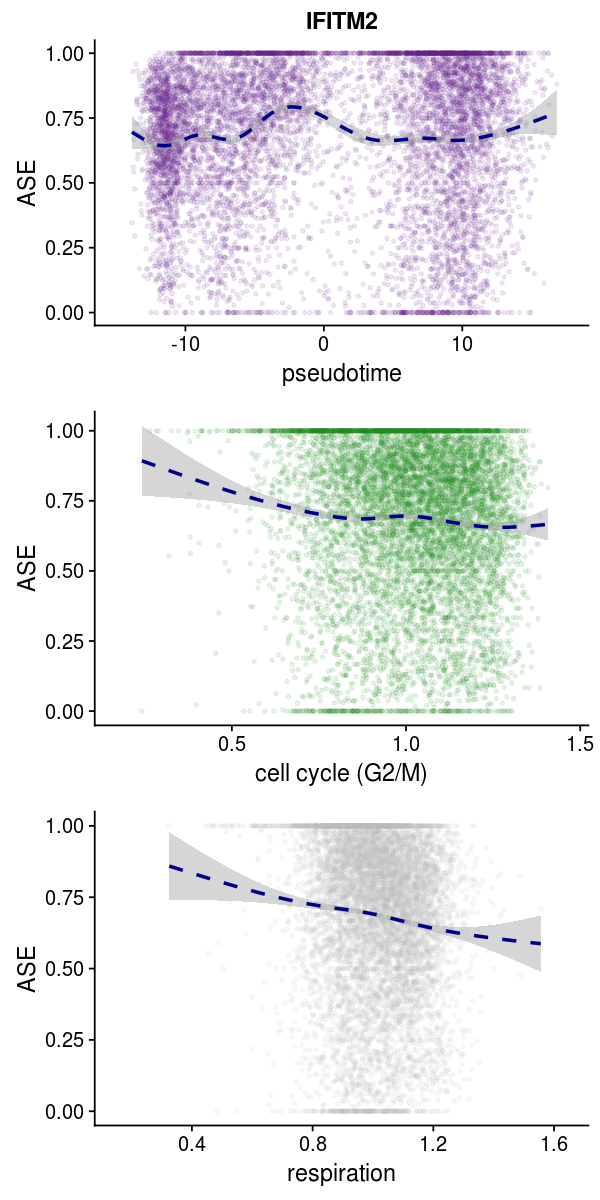

In [88]:
options(repr.plot.width = 5, repr.plot.height = 10)
plot_grid(p1,p2,p3, ncol = 1)

In [89]:
df.pseudo$random = 1:nrow(df.pseudo)

In [90]:
p = ggplot(df.pseudo, aes(x = pseudo, y = snp2))
p = p + ggtitle("IFITM2")
p = p + xlab("pseudotime") + ylab("ASE") 
p = p + geom_density_2d(col = "lightslateblue") 
# p = p + stat_density_2d(aes(fill = ..level..), geom = "polygon", col = "darkorchid3") 
p = p + stat_smooth(colour = "lightslateblue", linetype = 2, method = "lm")
p = p +  theme(legend.position = "none", panel.border = element_blank())
# options(repr.plot.width = 5, repr.plot.height = 3)
p1 = p

Loading required package: scales

Attaching package: ‘scales’

The following object is masked from ‘package:purrr’:

    discard

The following object is masked from ‘package:readr’:

    col_factor



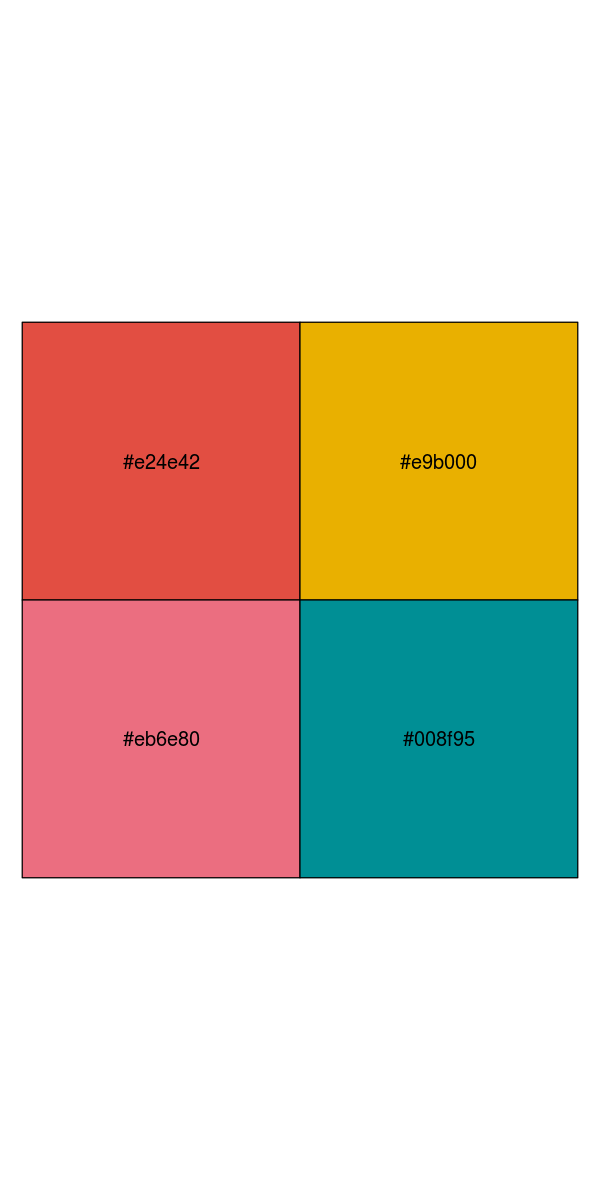

In [91]:
require("scales")
show_col(canva_pal("Bold and punchy")(4))
col_g2m = canva_pal("Bold and punchy")(4)[4]
col_resp = canva_pal("Bold and punchy")(4)[2]

In [92]:
p = ggplot(df.g2m, aes(x = G2M, y = snp2))
# p = p + ggtitle("IFITM2")
p = p + xlab("cell cycle (G2/M)") + ylab("ASE") 
p = p + geom_density_2d(col = col_g2m) 
# p = p + geom_point(alpha = 0.1, pch = 20, col = "forestgreen") 
p = p + stat_smooth(colour = col_g2m, linetype = 2, method = "lm")
p = p +  theme(legend.position="none", panel.border = element_blank())
p2 = p + xlim(c(0.5,1.3))

In [93]:
p = ggplot(df.resp, aes(x = respiration, y = snp2))
# p = p + ggtitle("IFITM2")
p = p + xlab("respiration") + ylab("ASE") 
p = p + geom_density_2d(col = col_resp) 
# p = p + geom_point(alpha = 0.1, pch = 20, col = "grey") 
p = p + stat_smooth(colour = col_resp, linetype = 2, method = "lm")
p = p +  theme(legend.position="none", panel.border = element_blank())
p3 = p + xlim(c(0.6,1.4))

Warning message:
“Removed 27323 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 27323 rows containing non-finite values (stat_smooth).”

Warning message:
“Removed 27588 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 27588 rows containing non-finite values (stat_smooth).”

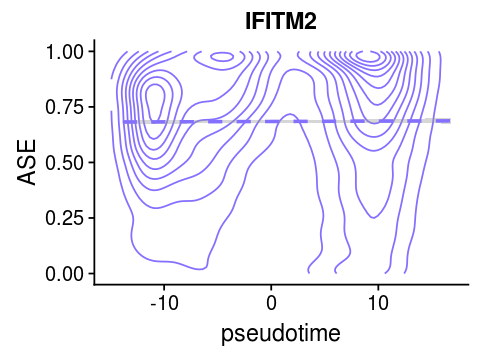

Warning message:
“Removed 27361 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 27361 rows containing non-finite values (stat_smooth).”

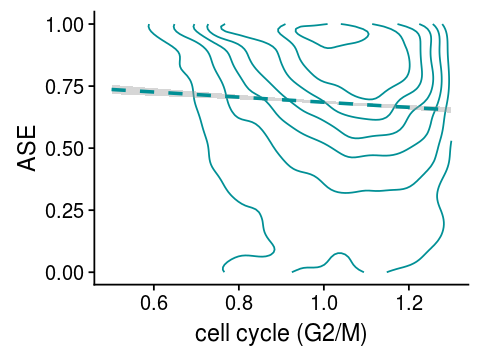

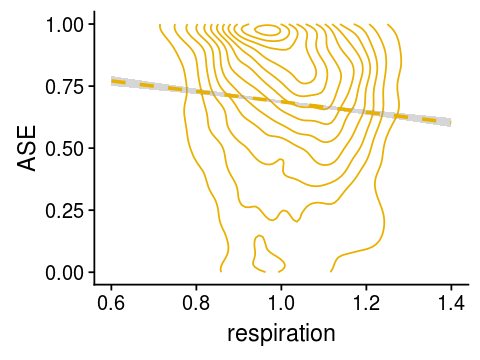

In [94]:
options(repr.plot.width = 4, repr.plot.height = 3)
# plot_grid(p1,p2,p3, ncol = 1)
p1
p2
p3

In [95]:
get_sign <- function(test, myfact){
    res = test
    res = res[res$n_cells > 500,]
    res = res[!(is.na(res$pval)),]
    res$corr_pval = p.adjust(res$pval, method = "BH")
    res[res$corr_pval < 0.1 & res$factor == myfact,]
} 

In [96]:
pseudo.linear.sign = get_sign(test, "pseudotime")
resp.linear.sign = get_sign(test, "respiration")
g1s.linear.sign = get_sign(test, "G1_S_transition")
sb.linear.sign = get_sign(test, "sterol_biosynthesis")
g2m.linear.sign = get_sign(test, "G2_M_transition")

In [97]:
pseudo.quadratic.sign = get_sign(quadratic, "pseudotime")

In [98]:
resp.corr.sign = get_sign(pseudocorrect, "respiration")
g1s.corr.sign = get_sign(pseudocorrect, "G1_S_transition")
sb.corr.sign = get_sign(pseudocorrect, "sterol_biosynthesis")
g2m.corr.sign = get_sign(pseudocorrect, "G2_M_transition")

In [99]:
head(nonlinear)

ensembl_gene_id snp_id         coef      pval         n_cells
1 ENSG00000132507 17_7207964_A_C 0.4925942 1.423945e-82 19271  
2 ENSG00000132507 17_7207964_A_C 0.2811927 8.621735e-45 19271  
3 ENSG00000132507 17_7207964_A_C 0.3527488 1.587768e-44 19271  
4 ENSG00000124614 6_34396160_C_T 0.6444228 4.987902e-37 10331  
5 ENSG00000124614 6_34393845_G_A 0.6444228 4.987902e-37 10331  
6 ENSG00000132507 17_7207964_A_C 0.2665369 4.209605e-33 19271  
  index                                 mean_ase  factor1            
1 ('ENSG00000132507', '17_7207964_A_C') 0.3418273 respiration        
2 ('ENSG00000132507', '17_7207964_A_C') 0.3418273 sterol_biosynthesis
3 ('ENSG00000132507', '17_7207964_A_C') 0.3418273 respiration        
4 ('ENSG00000124614', '6_34396160_C_T') 0.3681452 respiration        
5 ('ENSG00000124614', '6_34393845_G_A') 0.3681452 respiration        
6 ('ENSG00000132507', '17_7207964_A_C') 0.3418273 pseudotime         
  factor2            
1 sterol_biosynthesis
2 G2_M_transition    
3 G2_M_transition    
4 G2_M_transition    
5 G2_M_transition    
6 respiration

In [100]:
get_sign2 <- function(test, myfact){
    res = test[test$factor1 == "pseudotime",]
    res = res[res$n_cells > 500,]
    res = res[!(is.na(res$pval)),]
    res$corr_pval = p.adjust(res$pval, method = "BH")
    res[res$corr_pval < 0.1 & res$factor2 == myfact,]
} 

In [101]:
resp.pseudo.sign = get_sign2(nonlinear, "respiration")
g1s.pseudo.sign = get_sign2(nonlinear, "G1_S_transition")
sb.pseudo.sign = get_sign2(nonlinear, "sterol_biosynthesis")
g2m.pseudo.sign = get_sign2(nonlinear, "G2_M_transition")

In [102]:
pseudo_eqtls = unique(c(pseudo.linear.sign$index, pseudo.quadratic.sign$index))
length(pseudo_eqtls)

[1] 785

In [103]:
other_factors_eqtls = unique(c(resp.corr.sign$index, g1s.corr.sign$index, sb.corr.sign$index, g2m.corr.sign$index))
length(other_factors_eqtls)

[1] 686

In [104]:
non_linear_eqtls = unique(c(resp.pseudo.sign$index, g1s.pseudo.sign$index, sb.pseudo.sign$index, g2m.pseudo.sign$index))
length(non_linear_eqtls)

[1] 220

In [105]:
sum(pseudo_eqtls %in% other_factors_eqtls) 
length(pseudo_eqtls) - sum(pseudo_eqtls %in% other_factors_eqtls) 
length(other_factors_eqtls) - sum(pseudo_eqtls %in% other_factors_eqtls) 

[1] 292

[1] 493

[1] 394

In [106]:
sum(!(unique(test$index) %in% unique(c(pseudo_eqtls,other_factors_eqtls))))

[1] 3291

In [107]:
factor(df$eQTLs, levels(df$eQTLs)[c(3,2,4,1)])

factor(0)
Levels:

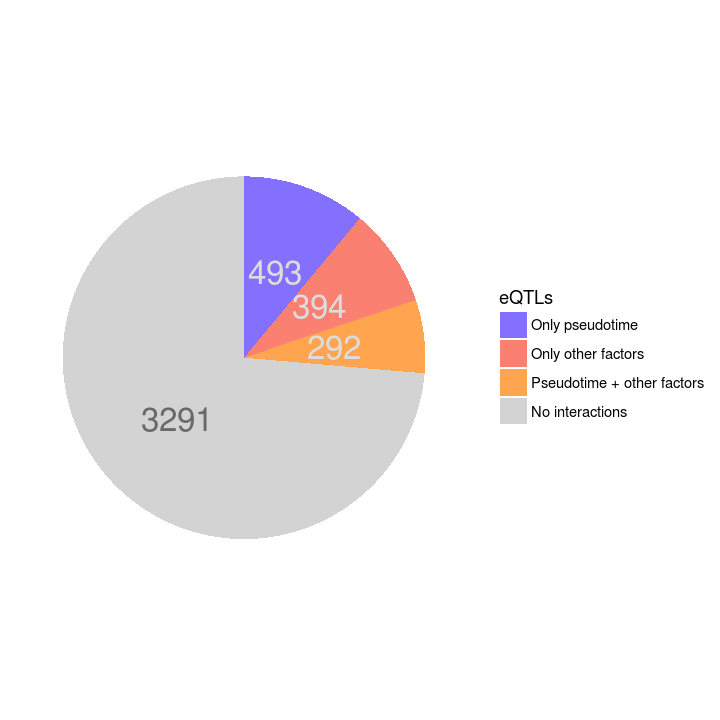

In [108]:
options(repr.plot.width = 6, repr.plot.height = 6)
df <- data.frame(
  eQTLs = as.factor(c("Only pseudotime", "Only other factors", "Pseudotime + other factors", "No interactions")),
  value = c(493, 394, 292, 3291)
  )
df$eQTLs = factor(df$eQTLs, levels(df$eQTLs)[c(3,2,4,1)])
bp <- ggplot(df, aes(x = "", y = value, fill = eQTLs)) + geom_bar(width = 1, stat = "identity")
pie <- bp + coord_polar("y", start = 0, direction = -1)

blank_theme <- theme_minimal()+
  theme(
  axis.title.x = element_blank(),
  axis.title.y = element_blank(),
  panel.border = element_blank(),
  panel.grid = element_blank(),
  axis.ticks = element_blank()
  )

library(scales)
pie +  scale_fill_manual(values = c("lightslateblue", "salmon", "tan1", "lightgrey")) + 
    blank_theme + theme(axis.text.x = element_blank())  +
    geom_text(aes(label = value), position = position_stack(vjust = 0.5),
             size = 7, col = c("dimgray", "gainsboro", "gainsboro", "gainsboro"))

In [ ]:
################################
########## New Results #########
################################
########### 15.08.19 ###########
################################

In [1]:
new_folder = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_endodiff/data/tables_for_anna_Aug2019/ase_interaction_results/"

In [2]:
test_filename = paste0(new_folder,"pseudotimeandmodules.pseudotime_2dof_test.all_leads.multitest_corrected.tsv")
pseudocorrect_filename = paste0(new_folder,"pseudotimeandmodules.single_factor_with_pseudotime_and_pseudotime_squared_cov_test.all_leads.multitest_corrected.tsv")
nonlinear_filename = paste0(new_folder,"pseudotimeandmodules.nonlinear_interaction_with_pseudotime.all_leads.multitest_corrected.tsv")

In [3]:
test = read.csv(test_filename, sep = "\t")
pseudocorrect = read.csv(pseudocorrect_filename, sep = "\t")
nonlinear = read.csv(nonlinear_filename, sep = "\t")

In [4]:
get_sign <- function(test, myfact){
    res = test
    res = res[res$n_cells > 50,]
    res = res[!(is.na(res$pval)),]
#     res$corr_pval = p.adjust(res$pval, method = "BH")
    res[res$qval < 0.1 & res$factor == myfact,]
} 

In [5]:
pseudo.2dof.sign = get_sign(test, "pseudotime")
####
resp.corr.sign = get_sign(pseudocorrect, "respiration")
g1s.corr.sign = get_sign(pseudocorrect, "G1_S_transition")
sb.corr.sign = get_sign(pseudocorrect, "sterol_biosynthesis")
g2m.corr.sign = get_sign(pseudocorrect, "G2_M_transition")

In [6]:
pseudo.2dof.sign$index = paste0(pseudo.2dof.sign$ensembl_gene_id,"-",pseudo.2dof.sign$snp_id)

In [7]:
pseudo_eqtls = unique(pseudo.2dof.sign$index)
length(pseudo_eqtls)

[1] 872

In [11]:
head(pseudo.2dof.sign)

ensembl_gene_id snp_id           pval          n_cells factor    
1 ENSG00000142089 11_320394_C_T    6.053215e-275 21955   pseudotime
2 ENSG00000120675 13_43597706_C_T  1.582229e-266 13767   pseudotime
3 ENSG00000142089 11_323649_C_T    5.008294e-264 21955   pseudotime
4 ENSG00000148834 10_106066436_C_T 2.075541e-198 16460   pseudotime
5 ENSG00000124614 6_34393845_G_A   4.246770e-118 10331   pseudotime
6 ENSG00000124614 6_34396160_C_T   4.246770e-118 10331   pseudotime
  qval          index                           
1 2.404337e-271 ENSG00000142089-11_320394_C_T   
2 3.142307e-263 ENSG00000120675-13_43597706_C_T 
3 6.630982e-261 ENSG00000142089-11_323649_C_T   
4 2.061013e-195 ENSG00000148834-10_106066436_C_T
5 2.811362e-115 ENSG00000124614-6_34393845_G_A  
6 2.811362e-115 ENSG00000124614-6_34396160_C_T

In [14]:
write.table(pseudo.2dof.sign,"/hps/nobackup/stegle/users/acuomo/all_scripts/sc_endodiff/ASE_results/pseudotime_sign_interactions.tsv", quote = F, row.names = F)

In [8]:
resp.corr.sign$index = paste0(resp.corr.sign$ensembl_gene_id,"-",resp.corr.sign$snp_id)
g1s.corr.sign$index = paste0(g1s.corr.sign$ensembl_gene_id,"-",g1s.corr.sign$snp_id)
sb.corr.sign$index = paste0(sb.corr.sign$ensembl_gene_id,"-",sb.corr.sign$snp_id)
g2m.corr.sign$index = paste0(g2m.corr.sign$ensembl_gene_id,"-",g2m.corr.sign$snp_id)

In [9]:
other_factors_eqtls = unique(c(resp.corr.sign$index, g1s.corr.sign$index, sb.corr.sign$index, g2m.corr.sign$index))
length(other_factors_eqtls)

[1] 668

In [134]:
sum(pseudo_eqtls %in% other_factors_eqtls) 
length(pseudo_eqtls) - sum(pseudo_eqtls %in% other_factors_eqtls) 
length(other_factors_eqtls) - sum(pseudo_eqtls %in% other_factors_eqtls) 

[1] 299

[1] 573

[1] 369

In [135]:
test$index = paste0(test$ensembl_gene_id,"-",test$snp_id)
pseudocorrect$index = paste0(pseudocorrect$ensembl_gene_id,"-",pseudocorrect$snp_id)

In [136]:
sum(!(unique(test$index) %in% unique(c(pseudo_eqtls,other_factors_eqtls))))

[1] 2731

In [ ]:
######### new fig. 4B

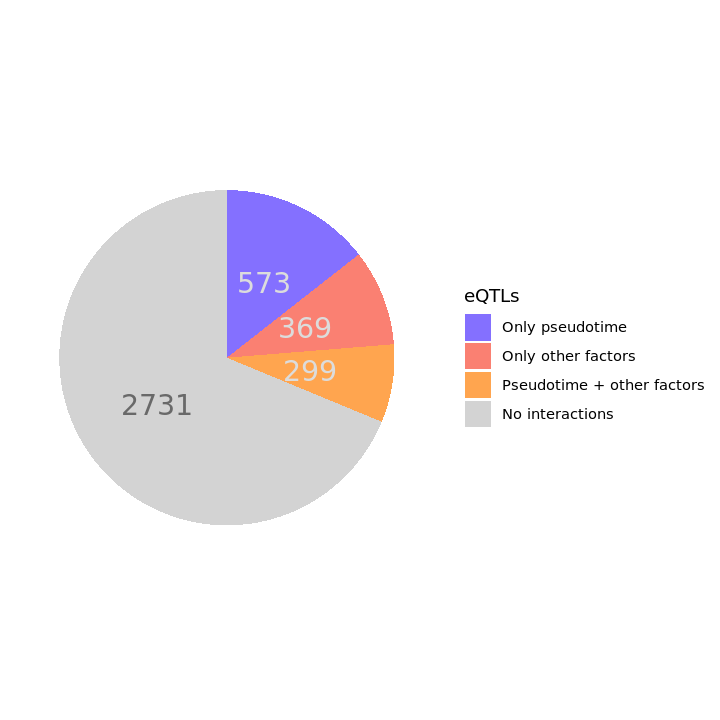

In [137]:
options(repr.plot.width = 6, repr.plot.height = 6)
df <- data.frame(
  eQTLs = as.factor(c("Only pseudotime", "Only other factors", "Pseudotime + other factors", "No interactions")),
  value = c(573, 369, 299, 2731)
  )
df$eQTLs = factor(df$eQTLs, levels(df$eQTLs)[c(3,2,4,1)])
bp <- ggplot(df, aes(x = "", y = value, fill = eQTLs)) + geom_bar(width = 1, stat = "identity")
pie <- bp + coord_polar("y", start = 0, direction = -1)

blank_theme <- theme_minimal()+
  theme(
  axis.title.x = element_blank(),
  axis.title.y = element_blank(),
  panel.border = element_blank(),
  panel.grid = element_blank(),
  axis.ticks = element_blank()
  )

library(scales)
pie +  scale_fill_manual(values = c("lightslateblue", "salmon", "tan1", "lightgrey")) + 
    blank_theme + theme(axis.text.x = element_blank())  +
    geom_text(aes(label = value), position = position_stack(vjust = 0.5),
             size = 6, col = c("dimgray", "gainsboro", "gainsboro", "gainsboro"))

In [174]:
head(nonlinear,2)

ensembl_gene_id snp_id          pval         n_cells factor      qval        
1 ENSG00000214078 20_34344225_T_A 6.933501e-25  4375   respiration 1.101595e-20
2 ENSG00000132507 17_7207964_A_C  7.117386e-15 19271   respiration 5.654052e-11

In [177]:
res = nonlinear
res = res[res$n_cells > 50,]
res = res[!(is.na(res$pval)),]
res[res$qval < 0.1 & res$ensembl_gene_id == "ENSG00000197728",]

ensembl_gene_id snp_id          pval         n_cells factor         
157 ENSG00000197728 12_56401085_G_A 0.0006285851 16959   G2_M_transition
    qval      
157 0.06204624

In [ ]:
######### new fig. S13

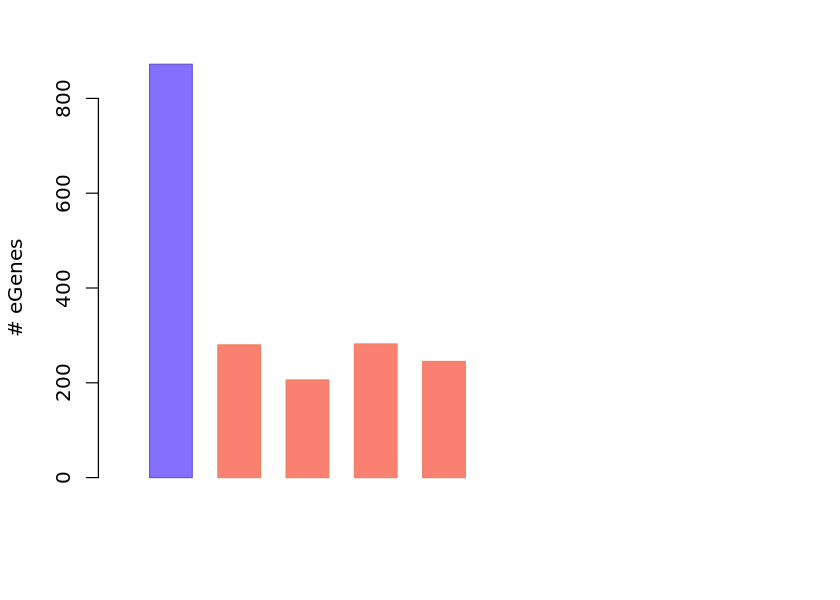

In [182]:
options(repr.plot.width = 7, repr.plot.height = 5)
single_factor <- c(length(unique(pseudo.2dof.sign$index)),
                   length(unique(resp.corr.sign$index)),
                   length(unique(g1s.corr.sign$index)),
                   length(unique(sb.corr.sign$index)),
                   length(unique(g2m.corr.sign$index)))
x <- barplot(single_factor, 
             border = c('slateblue','salmon2', 'salmon2', 'salmon2', 'salmon2'),
             col = c('lightslateblue','salmon', 'salmon', 'salmon', 'salmon'),
             xlim = c(0, 6), ylim = c(0, 800), space = 0.6,
             width = 0.4, ylab = "# eGenes")

In [155]:
# gtex_tagging_filename = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_endodiff/data/qtl_annotation/all_results_combined.tsv.all_gtex_gwas_tagging_annotations.1000g_ref.txt"
gtex_tagging_filename = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_endodiff/data/qtl_annotation/all_results_combined.tsv.all_gtex_gwas_tagging_annotations.hipsci_ref.txt"
# gtex_tagging_filename = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_endodiff/data/qtl_annotation/all_results_combined.tsv.all_gtex_gwas_tagging_annotations.txt"
gtex_tagging = read.csv(gtex_tagging_filename, sep = "\t")
gtex_tagging$how_many_tissues = 0
for (i in 1:nrow(gtex_tagging)){
    gtex_tagging$how_many_tissues[i] = sum(gsub("-","0",gsub("\\}","",gsub("\\{","",gtex_tagging[i,grep("LD",colnames(gtex_tagging))])))>0)
}

In [156]:
gwas_tagging = gtex_tagging[gtex_tagging$GWAS_LD != "-",]

In [157]:
gwas_tagging$ensembl_gene_id = gsub("*_.*", "", gwas_tagging$feature)
head(gwas_tagging,1)

feature                  snp_id         stage beta.mean beta_se  
2 ENSG00000179344_HLA-DQB1 6_32634922_A_G ips   -1.270786 0.1469673
  empirical_feature_p_value p_value.mean global_corr_p_value snp_chromosome
2 1.977147e-11              5.299864e-18 1.340269e-09        6             
  snp_position ⋯
2 32634922     ⋯
  Vagina_Annotation                                                        
2 {6_32501169_C_T_b37-ENSG00000196301};{6_32620344_G_A_b37-ENSG00000179344}
  Vagina_LD                                
2 {0.4149214159283577};{0.3016781046697814}
  Whole_Blood_Variant                                
2 {6_32608508};{6_32526526};{6_32627082};{6_32607558}
  Whole_Blood_Annotation                                                                                                                             
2 {6_32608508_A_T_b37-ENSG00000196735};{6_32526526_A_G_b37-ENSG00000198502};{6_32627082_A_G_b37-ENSG00000223534};{6_32607558_A_G_b37-ENSG00000232629}
  Whole_Blood_LD                                                                      
2 {0.4062001050131084};{0.36551405659243374};{0.7164536068532416};{0.2915903443713935}
  ipsc_hipsci_eqtls_mirauta2018_Variant
2 -                                    
  ipsc_hipsci_eqtls_mirauta2018_Annotation ipsc_hipsci_eqtls_mirauta2018_LD
2 -                                        -                               
  how_many_tissues ensembl_gene_id
2 49               ENSG00000179344

In [158]:
resp.corr.sign = get_sign(pseudocorrect, "respiration")
# head(resp.corr.sign)
gwas_resp = inner_join(resp.corr.sign, gwas_tagging, by = c("ensembl_gene_id","snp_id"))

In [159]:
# gwas_resp[order(gwas_resp$GWAS_LD, decreasing = T),c("GWAS_Variant","GWAS_LD")]
gwas_resp[,c("GWAS_Variant","GWAS_LD","feature","GWAS_Annotation")]

GWAS_Variant                                                                                                                                                                                      
1  {20_34218673};{20_34350666}                                                                                                                                                                       
2  {6_34302869}                                                                                                                                                                                      
3  {6_34302869}                                                                                                                                                                                      
4  {6_34302869}                                                                                                                                                                                      
5  {11_43864278}                                                                                                                                                                                     
6  {6_32413051};{6_32592200};{6_32404377};{6_32622359};{6_32413545};{6_32544697};{6_32566577};{6_32460798};{6_32594309};{6_32587859};{6_32600375};{6_32401079};{6_32432969};{6_32586854};{6_32612301}
7  {11_43877934}                                                                                                                                                                                     
8  {11_43877934}                                                                                                                                                                                     
9  {2_171941018};{2_171990971}                                                                                                                                                                       
10 {2_171941018};{2_171990971}                                                                                                                                                                       
11 {9_33125000};{9_33124872};{9_33128021};{9_33153527};{9_33168891};{9_33139453}                                                                                                                     
12 {9_33124872};{9_33128021};{9_33153527};{9_33168891};{9_33139453}                                                                                                                                  
13 {19_24050828}                                                                                                                                                                                     
14 {22_41816652};{22_41867377}                                                                                                                                                                       
15 {3_52721305};{3_52809525};{3_52584787};{3_52706724};{3_52584715};{3_52755592}                                                                                                                     
16 {20_34218673};{20_34350666}                                                                                                                                                                       
17 {20_34218673};{20_34350666}                                                                                                                                                                       
18 {22_41767486};{22_41816652};{22_41720697};{22_41867377};{22_41720728}                                                                                                                             
19 {12_56394954};{12_56401085};{12_56384804};{12_56435929};{12_56470625}                                                                                                                             
20 {12_56394954};{12_56401085};{12_56384804

In [160]:
g1s.corr.sign = get_sign(pseudocorrect, "G1_S_transition")
gwas_g1s = inner_join(g1s.corr.sign, gwas_tagging, by = c("ensembl_gene_id","snp_id"))
nrow(gwas_g1s)

[1] 29

In [161]:
# gwas_g1s[order(gwas_g1s$GWAS_LD, decreasing = T),c("GWAS_Variant","GWAS_LD")]
gwas_g1s[,c("GWAS_Variant","GWAS_LD","feature","GWAS_Annotation")]

GWAS_Variant                                                                             
1  {12_56394954};{12_56401085};{12_56384804};{12_56435929};{12_56470625}                    
2  {12_56394954};{12_56401085};{12_56384804};{12_56435929};{12_56470625}                    
3  {12_56401085};{12_56435929};{12_56470625}                                                
4  {19_24050828}                                                                            
5  {12_69752200}                                                                            
6  {6_88133315}                                                                             
7  {1_21795388}                                                                             
8  {11_43864278}                                                                            
9  {11_838722}                                                                              
10 {3_121543577}                                                                            
11 {11_43877934}                                                                            
12 {11_43877934}                                                                            
13 {4_185639169}                                                                            
14 {22_41767486};{22_41816652};{22_41720697};{22_41867377};{22_41720728}                    
15 {11_62103420}                                                                            
16 {10_100148176};{10_100148058};{10_100156853};{10_100147060};{10_100146084};{10_100159136}
17 {9_33125000};{9_33124872};{9_33128021};{9_33153527};{9_33168891};{9_33139453}            
18 {2_171941018};{2_171990971}                                                              
19 {16_423813}                                                                              
20 {20_34218673};{20_34350666}                                                              
21 {4_185639169}                                                                            
22 {2_9972442}                                                                              
23 {17_7460685}                                                                             
24 {10_100148058};{10_100156853};{10_100159136}                                             
25 {10_100148058};{10_100156853};{10_100159136}                                             
26 {2_169091942};{2_169155595};{2_169110394}                                                
27 {19_45395619};{19_45392254}                                                              
28 {6_167394634};{6_167370230};{6_167383075}                                                
29 {9_33124872};{9_33128021};{9_33153527};{9_33168891};{9_33139453}                         
   GWAS_LD                                                                                                                      
1  {0.9086578445310003};{0.9999999999999998};{0.8871944798453143};{0.9846248502082993};{0.8802746114261513}                     
2  {0.9086578445310003};{0.9999999999999998};{0.8871944798453143};{0.9846248502082993};{0.8802746114261513}                     
3  {0.87659227794387};{0.8839914405997638};{0.9961600409568974}                                                                 
4  {1.0}                                                                                                                        
5  {1.0000000000000007}                                                                                                         
6  {0.8003097717533744}                                                                                                         
7  {0.8871291514052875}                                                                                                         
8  {1.0}                                                                                                                        
9  {1.0000000000000002}                             

In [162]:
sb.corr.sign = get_sign(pseudocorrect, "sterol_biosynthesis")
gwas_sb = inner_join(sb.corr.sign, gwas_tagging, by = c("ensembl_gene_id","snp_id"))
nrow(gwas_sb)

[1] 49

In [163]:
gwas_sb[,c("GWAS_Variant","GWAS_LD","feature","GWAS_Annotation")]

GWAS_Variant                                                                                                                                                                                      
1  {20_34218673};{20_34350666}                                                                                                                                                                       
2  {20_34218673};{20_34350666}                                                                                                                                                                       
3  {20_34218673};{20_34350666}                                                                                                                                                                       
4  {6_34302869}                                                                                                                                                                                      
5  {6_34302869}                                                                                                                                                                                      
6  {6_34302869}                                                                                                                                                                                      
7  {2_171941018};{2_171990971}                                                                                                                                                                       
8  {5_156810072}                                                                                                                                                                                     
9  {5_156810072}                                                                                                                                                                                     
10 {5_156810072}                                                                                                                                                                                     
11 {11_43877934}                                                                                                                                                                                     
12 {11_43877934}                                                                                                                                                                                     
13 {11_66337874}                                                                                                                                                                                     
14 {20_25298087}                                                                                                                                                                                     
15 {11_229977}                                                                                                                                                                                       
16 {20_25298087}                                                                                                                                                                                     
17 {11_43864278}                                                                                                                                                                                     
18 {9_33125000};{9_33124872};{9_33128021};{9_33153527};{9_33168891};{9_33139453}                                                                                                                     
19 {9_33124872};{9_33128021};{9_33153527};{9_33168891};{9_33139453}                                                                                                                                  
20 {22_25875573}                           

In [164]:
# gwas_sb[order(gwas_sb$GWAS_LD, decreasing = T),c("GWAS_Variant","GWAS_LD","feature")]

In [165]:
g2m.corr.sign = get_sign(pseudocorrect, "G2_M_transition")
gwas_g2m = inner_join(g2m.corr.sign, gwas_tagging, by = c("ensembl_gene_id","snp_id"))
nrow(gwas_g2m)

[1] 35

In [166]:
gwas_g2m[,c("GWAS_Variant","GWAS_LD","feature","GWAS_Annotation")]

GWAS_Variant                                                                                                                                                                                      
1  {20_34218673};{20_34350666}                                                                                                                                                                       
2  {20_34218673};{20_34350666}                                                                                                                                                                       
3  {20_34218673};{20_34350666}                                                                                                                                                                       
4  {11_43877934}                                                                                                                                                                                     
5  {11_43877934}                                                                                                                                                                                     
6  {11_43864278}                                                                                                                                                                                     
7  {9_33125000};{9_33124872};{9_33128021};{9_33153527};{9_33168891};{9_33139453}                                                                                                                     
8  {9_33124872};{9_33128021};{9_33153527};{9_33168891};{9_33139453}                                                                                                                                  
9  {11_66337874}                                                                                                                                                                                     
10 {22_24250795}                                                                                                                                                                                     
11 {22_24250795}                                                                                                                                                                                     
12 {9_33113322}                                                                                                                                                                                      
13 {18_43856297};{18_43793488}                                                                                                                                                                       
14 {20_25298087}                                                                                                                                                                                     
15 {22_25875573}                                                                                                                                                                                     
16 {22_25875573}                                                                                                                                                                                     
17 {7_23123877}                                                                                                                                                                                      
18 {19_41922352};{19_41937095}                                                                                                                                                                       
19 {15_75208549};{15_75212357};{15_75229100}                                                                                                                                                         
20 {6_34793124};{6_34824636}               

In [167]:
# gwas_g2m[order(gwas_g2m$GWAS_LD, decreasing = T),c("GWAS_Variant","GWAS_LD","feature")]

In [168]:
pseudo.2dof.sign = get_sign(test, "pseudotime")
pseudo = inner_join(pseudo.2dof.sign, gwas_tagging, by = c("ensembl_gene_id","snp_id"))
nrow(pseudo)

[1] 118

In [169]:
pseudo[,c("GWAS_Variant","GWAS_LD","feature","GWAS_Annotation")]

GWAS_Variant                                                                                                                                                                                      
1   {6_34302869}                                                                                                                                                                                      
2   {6_34302869}                                                                                                                                                                                      
3   {6_34302869}                                                                                                                                                                                      
4   {16_423813}                                                                                                                                                                                       
5   {12_56394954};{12_56401085};{12_56384804};{12_56435929};{12_56470625}                                                                                                                             
6   {12_56394954};{12_56401085};{12_56384804};{12_56435929};{12_56470625}                                                                                                                             
7   {6_32663631};{6_32668439};{6_32672089}                                                                                                                                                            
8   {6_32663631};{6_32668439};{6_32672089}                                                                                                                                                            
9   {6_32663631};{6_32668439};{6_32672089}                                                                                                                                                            
10  {12_56401085};{12_56435929};{12_56470625}                                                                                                                                                         
11  {2_65279805};{2_65283972};{2_65284231}                                                                                                                                                            
12  {4_17520066}                                                                                                                                                                                      
13  {4_17520066}                                                                                                                                                                                      
14  {2_219557738};{2_219472325};{2_219349752};{2_219279097}                                                                                                                                           
15  {20_34218673};{20_34350666}                                                                                                                                                                       
16  {2_65279805};{2_65283972};{2_65284623};{2_65284231}                                                                                                                                               
17  {4_17520066}                                                                                                                                                                                      
18  {15_89445651}                                                                                                                                                                                     
19  {11_229977}                                                                                                                                                                                       
20  {6_96031111}        

In [170]:
gwas_interactionqtls = rbind(gwas_resp, gwas_g1s, gwas_sb, gwas_g2m)
gwas_interactionqtls$eqtls = paste0(gwas_interactionqtls$feature,"-",gwas_interactionqtls$snp_id)
length(unique(gwas_interactionqtls$eqtls))

[1] 86

In [171]:
gwas_interactionqtls = rbind(gwas_resp, gwas_g1s, gwas_sb, gwas_g2m, pseudo)
gwas_interactionqtls$eqtls = paste0(gwas_interactionqtls$feature,"-",gwas_interactionqtls$snp_id)
length(unique(gwas_interactionqtls$eqtls))

[1] 148